In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [99]:
np.random.seed(0)

In [100]:
df=pd.read_csv("bangalore_cleaned_data.csv")

In [101]:
df.dtypes

,0
Unnamed: 0,object
Price,float64


In [102]:
df['Unnamed: 0']=pd.to_datetime(df['Unnamed: 0'])

In [103]:
df.dtypes

,0
Unnamed: 0,datetime64[ns]
Price,float64


In [104]:
df.set_index('Unnamed: 0',inplace=True)

In [105]:
df.head()

,Price
Unnamed: 0,
2018-01-01,7399000.0
2018-01-02,7700000.0
2018-01-03,7500000.0
2018-01-04,4000000.0
2018-01-05,4850000.0


In [106]:
df.shape

(2557, 1)

In [107]:
def stationary_test(dataframe,column):
  dataframe['rolling_mean']=dataframe[column].rolling(window=12).mean().shift(1)
  dataframe['rolling_std']=dataframe[column].rolling(window=12).std().shift(1)
  adftest=adfuller(dataframe[column],autolag=None)
  stats=pd.Series(adftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(stats)
  for key,value in adftest[4].items():
    print('\n Critical Values:')
    print(f'   {key}, {value}')
  dataframe.dropna(inplace=True)
  sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y=column)
  sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y='rolling_mean')
  sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y='rolling_std')
  plt.xticks(rotation=90)
  plt.legend()

Test Statistic                -8.454206e+00
p-value                        1.631432e-13
Lags Used                      2.700000e+01
Number of Observations Used    2.529000e+03
dtype: float64

 Critical Values:
   1%, -3.432938355012086

 Critical Values:
   5%, -2.8626835272597217

 Critical Values:
   10%, -2.567378742868999


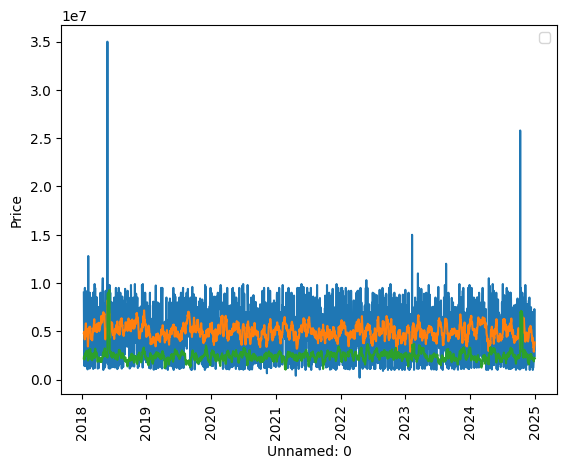

In [108]:
stationary_test(df,'Price')

Test Statistic                -1.676894e+01
p-value                        1.291697e-29
Lags Used                      2.700000e+01
Number of Observations Used    2.516000e+03
dtype: float64

 Critical Values:
   1%, -3.4329517425474014

 Critical Values:
   5%, -2.862689439250822

 Critical Values:
   10%, -2.5673818904827863


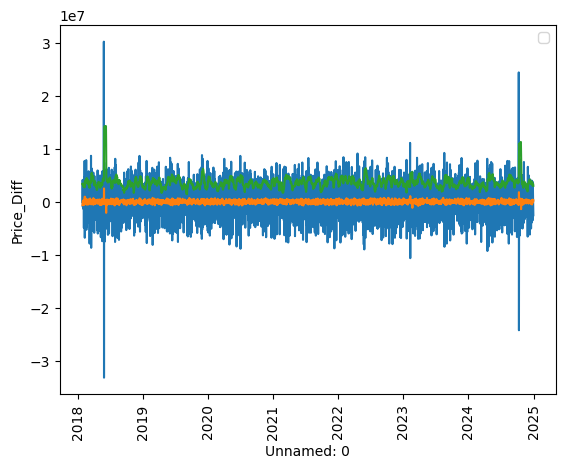

In [109]:
df1=df.copy()
df1['Price_Diff']=df1['Price']-df1['Price'].shift(1)
df1.dropna(inplace=True)
stationary_test(df1,'Price_Diff')

Test Statistic                -8.261632e+00
p-value                        5.064950e-13
Lags Used                      2.700000e+01
Number of Observations Used    2.517000e+03
dtype: float64

 Critical Values:
   1%, -3.4329507078222634

 Critical Values:
   5%, -2.8626889823128554

 Critical Values:
   10%, -2.567381647203466


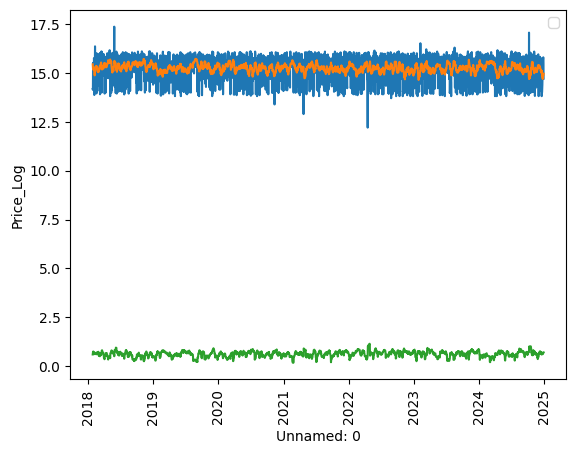

In [110]:
df2=df.copy()
df2['Price_Log']=np.log(df2['Price'])
df2.dropna(inplace=True)
stationary_test(df2,'Price_Log')

Test Statistic                -8.305072e+00
p-value                        3.923667e-13
Lags Used                      2.700000e+01
Number of Observations Used    2.517000e+03
dtype: float64

 Critical Values:
   1%, -3.4329507078222634

 Critical Values:
   5%, -2.8626889823128554

 Critical Values:
   10%, -2.567381647203466


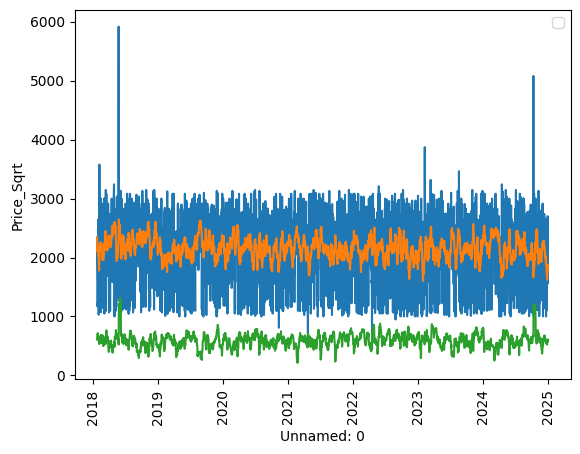

In [111]:
df3=df.copy()
df3['Price_Sqrt']=np.sqrt(df3['Price'])
df3.dropna(inplace=True)
stationary_test(df3,'Price_Sqrt')

Test Statistic                -8.279406e+00
p-value                        4.562615e-13
Lags Used                      2.700000e+01
Number of Observations Used    2.517000e+03
dtype: float64

 Critical Values:
   1%, -3.4329507078222634

 Critical Values:
   5%, -2.8626889823128554

 Critical Values:
   10%, -2.567381647203466


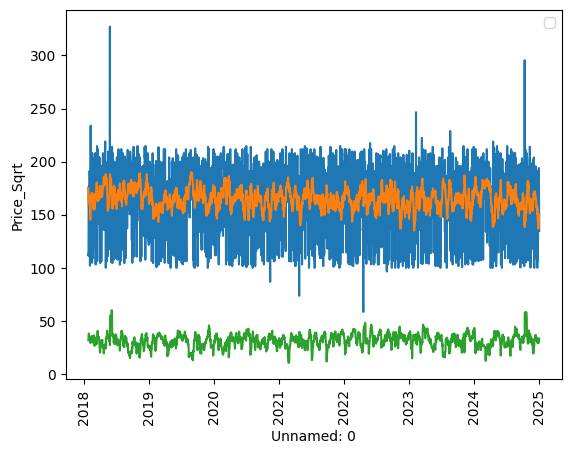

In [112]:
df4=df.copy()
df4['Price_Sqrt']=np.cbrt(df4['Price'])
df4.dropna(inplace=True)
stationary_test(df4,'Price_Sqrt')

Test Statistic                -8.263056e+00
p-value                        5.022760e-13
Lags Used                      2.700000e+01
Number of Observations Used    2.517000e+03
dtype: float64

 Critical Values:
   1%, -3.4329507078222634

 Critical Values:
   5%, -2.8626889823128554

 Critical Values:
   10%, -2.567381647203466


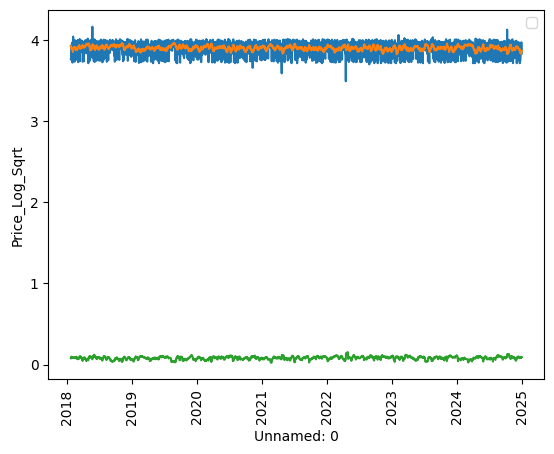

In [113]:
df5=df.copy()
df5['Price_Log']=np.log(df5['Price'])
df5['Price_Log_Sqrt']=np.sqrt(df5['Price_Log'])
df5.dropna(inplace=True)
stationary_test(df5,'Price_Log_Sqrt')

Test Statistic                -1.668351e+01
p-value                        1.509355e-29
Lags Used                      2.700000e+01
Number of Observations Used    2.516000e+03
dtype: float64

 Critical Values:
   1%, -3.4329517425474014

 Critical Values:
   5%, -2.862689439250822

 Critical Values:
   10%, -2.5673818904827863


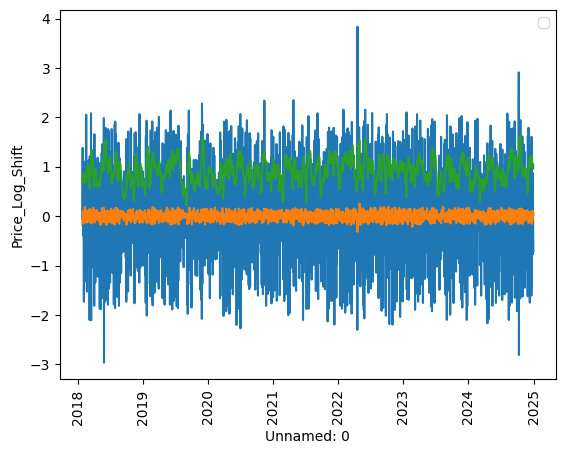

In [114]:
df6=df.copy()
df6['Price_Log']=np.log(df6['Price'])
df6['Price_Log_Shift']=df6['Price_Log']-df6['Price_Log'].shift(1)
df6.dropna(inplace=True)
stationary_test(df6,'Price_Log_Shift')

Test Statistic                -8.263672e+00
p-value                        5.004611e-13
Lags Used                      2.700000e+01
Number of Observations Used    2.517000e+03
dtype: float64

 Critical Values:
   1%, -3.4329507078222634

 Critical Values:
   5%, -2.8626889823128554

 Critical Values:
   10%, -2.567381647203466


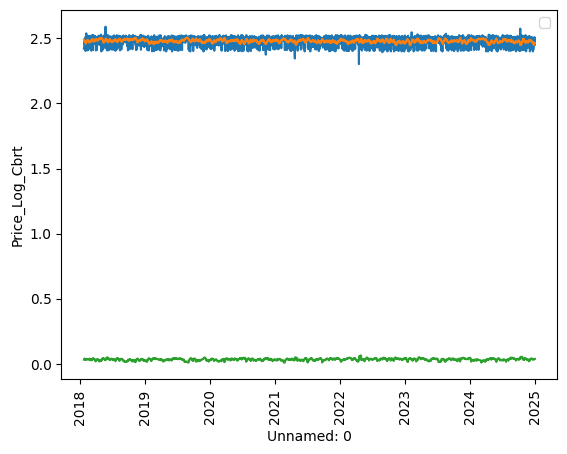

In [115]:
df7=df.copy()
df7['Price_Log']=np.log(df7['Price'])
df7['Price_Log_Cbrt']=np.cbrt(df7['Price_Log'])
df7.dropna(inplace=True)
stationary_test(df7,'Price_Log_Cbrt')

Test Statistic                -8.261632e+00
p-value                        5.064950e-13
Lags Used                      2.700000e+01
Number of Observations Used    2.517000e+03
dtype: float64

 Critical Values:
   1%, -3.4329507078222634

 Critical Values:
   5%, -2.8626889823128554

 Critical Values:
   10%, -2.567381647203466


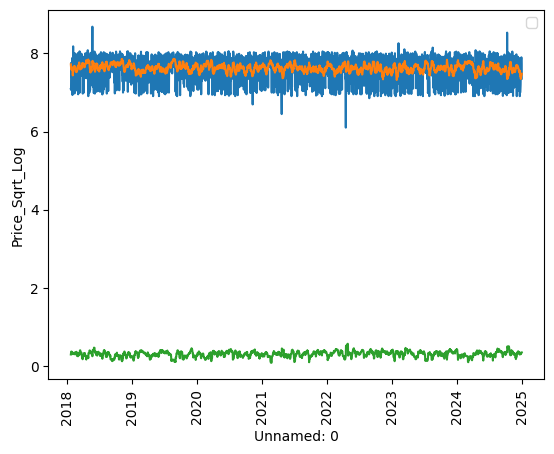

In [116]:
df12=df.copy()
df12['Price_Sqrt']=np.sqrt(df12['Price'])
df12['Price_Sqrt_Log']=np.log(df12['Price_Sqrt'])
df12.dropna(inplace=True)
stationary_test(df12,'Price_Sqrt_Log')

Test Statistic                -8.261632e+00
p-value                        5.064950e-13
Lags Used                      2.700000e+01
Number of Observations Used    2.517000e+03
dtype: float64

 Critical Values:
   1%, -3.4329507078222634

 Critical Values:
   5%, -2.8626889823128554

 Critical Values:
   10%, -2.567381647203466


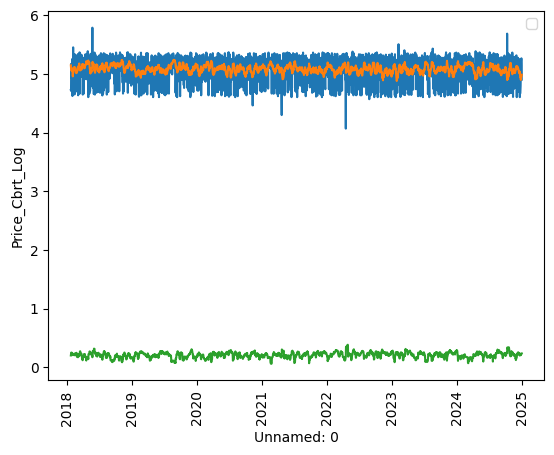

In [117]:
df13=df.copy()
df13['Price_Cbrt']=np.cbrt(df13['Price'])
df13['Price_Cbrt_Log']=np.log(df13['Price_Cbrt'])
df13.dropna(inplace=True)
stationary_test(df13,'Price_Cbrt_Log')

In [118]:

df_model=df.copy()
df_model['Price_Diff']=df_model['Price']-df_model['Price'].shift(1)
df_model['Price_Log']=np.log(df_model['Price'])
df_model['Price_Sqrt']=np.sqrt(df_model['Price'])
df_model['Price_Cbrt']=np.cbrt(df_model['Price'])
df_model['Price_Log_Sqrt']=np.sqrt(df_model['Price_Log'])
df_model['Price_Log_Shift']=df_model['Price_Log']-df_model['Price_Log'].shift(1)
df_model['Price_Log_Cbrt']=np.cbrt(df_model['Price_Log'])
df_model['Price_Detrend']=df_model['Price']-df_model['Price'].mean()
df_model['Price_Log_Detrend']=df_model['Price_Log']-df_model['Price_Log'].mean()
df_model['Price_Sqrt_Detrend']=df_model['Price_Sqrt']-df_model['Price_Sqrt'].mean()
df_model['Price_Cbrt_Detrend']=df_model['Price_Cbrt']-df_model['Price_Cbrt'].mean()
df_model['Price_Sqrt_Log']=np.log(df_model['Price_Sqrt'])
df_model['Price_Cbrt_Log']=np.log(df_model['Price_Cbrt'])
df_model.dropna(inplace=True)


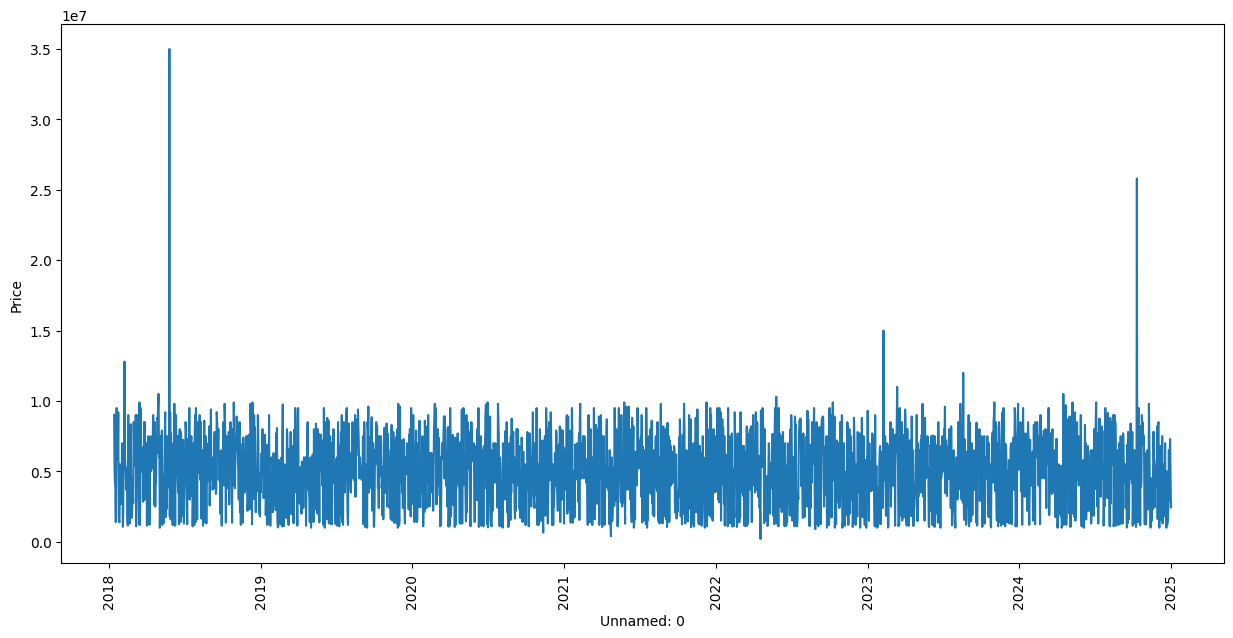

In [119]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df.index,y=df['Price'])

plt.xticks(rotation=90)
plt.show()

In [120]:
train=df_model.iloc[:585]
test=df_model.iloc[585:]

In [121]:
model = auto_arima(df_model['Price_Diff'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Diff'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84149.372, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.72 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=5.44 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=4.48 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=8.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=83379.479, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=2.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.49 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=3.10 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=4.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=83080.268, Time=1.52 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.80 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=2.60 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=82903.221, Time=0.24 sec


In [122]:
model1=ARIMA(train['Price_Diff'].dropna(),order=(5,0,0))
model1=model1.fit()
arima_pred=model1.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPred1']=arima_pred.values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-122-8e5c797c2285>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred1']=arima_pred.values


In [123]:
mae = mean_absolute_error(test['Price_Diff'], test['arimaPred1'])
mse = mean_squared_error(test['Price_Diff'], test['arimaPred1'])
rmse = np.sqrt(mse)
aic=model1.aic
bic=model1.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 2862870.127418819 MSE 12963495486620.764 RMSE 3600485.4515218865  AIC 19088.829490810585 BIC 19119.43077374121


In [124]:
model1=ARIMA(df_model['Price_Diff'].dropna(),order=(5,0,0))
model1=model1.fit()
forecast_steps=365
predictions=model1.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
last_known_price = df_model['Price'].iloc[-1]
predicted_prices = []
for pred in predictions.values:
    last_known_price += pred
    predicted_prices.append(last_known_price)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


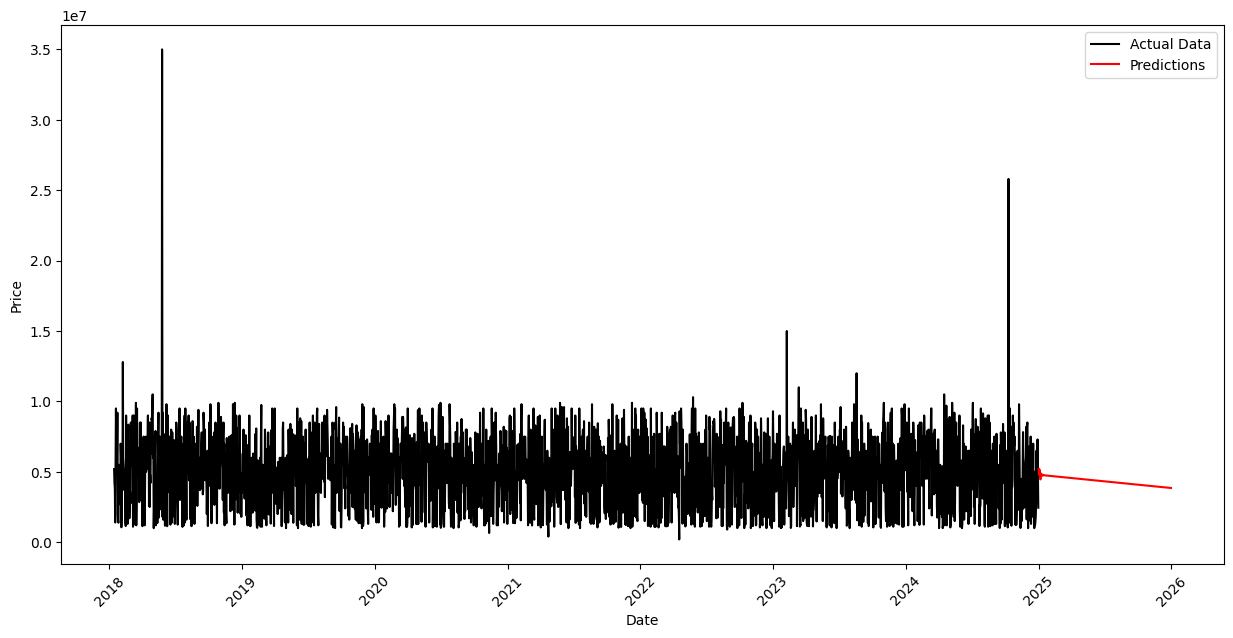

In [125]:
plt.figure(figsize=(15,7))
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [126]:
model = auto_arima(df_model['Price_Log'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Log'].dropna())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6723.887, Time=0.85 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.79 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.95 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.64 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=7.53 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4977.952, Time=7.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5999.738, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.54 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5696.210, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.79 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5534.238, Time=1.54 se

In [127]:
model2 = ARIMA(train['Price_Log'].dropna(), order=(0,1,5))
model2 = model2.fit()
arima_pred = model2.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred2'] = arima_pred.values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-127-3c0a375360e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [128]:
mae = mean_absolute_error(test['Price_Log'], test['arimaPred2'])
mse = mean_squared_error(test['Price_Log'], test['arimaPred2'])
rmse = np.sqrt(mse)
aic=model2.aic
bic=model2.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.5096249422390108 MSE 0.45178635982667215 RMSE 0.6721505484835016 AIC 1095.3927363673195 BIC 1121.6121422642889


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


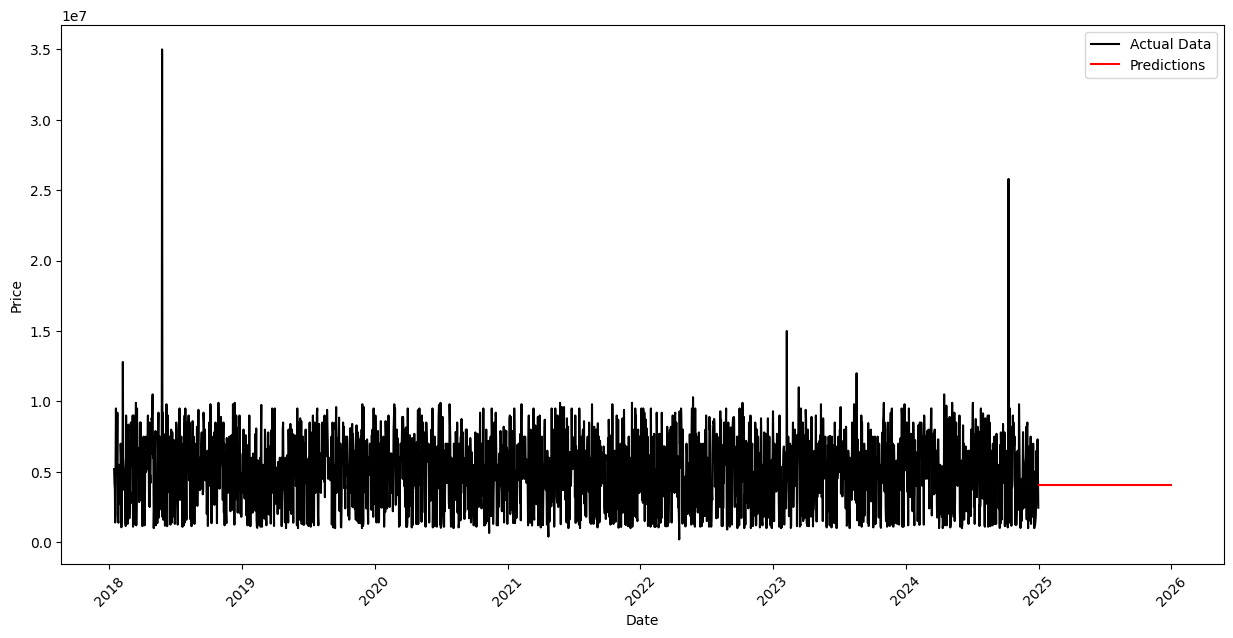

In [129]:
model2=ARIMA(df_model['Price_Log'].dropna(),order=(0,1,5))
model2=model2.fit()
forecast_steps=365
predictions=model2.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = np.exp(pred)
    predicted_prices.append(t)
plt.figure(figsize=(15,7))
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [130]:
predicted_prices[0:5]

[4054004.7381331082,
 4066197.3493366386,
 4062542.534675026,
 4071529.7945380365,
 4062554.9744200637]

In [131]:
model = auto_arima(df_model['Price_Sqrt'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Sqrt'].dropna())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=41619.975, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.64 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=8.79 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=40874.494, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=4.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=40570.859, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=40401.207, Time=0.50 sec


In [132]:
model3 = ARIMA(train['Price_Sqrt'].dropna(), order=(5,1,0))
model3 = model3.fit()
arima_pred = model3.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred3'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Sqrt'], test['arimaPred3'])))
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
forecast_steps = 365
predictions = model3.forecast(steps=forecast_steps)
predicted_prices = []
for pred in predictions.values:
    t = pred**2
    predicted_prices.append(t)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


812.3115518713513


<ipython-input-132-fb5b6c6e0dd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred3'] = arima_pred.values


In [133]:
mae = mean_absolute_error(test['Price_Sqrt'], test['arimaPred3'])
mse = mean_squared_error(test['Price_Sqrt'], test['arimaPred3'])
rmse = np.sqrt(mse)
aic=model3.aic
bic=model3.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 628.5423379112817 MSE 659850.057303643 RMSE 812.3115518713513  AIC 9221.074655380016 BIC 9247.294061276985


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


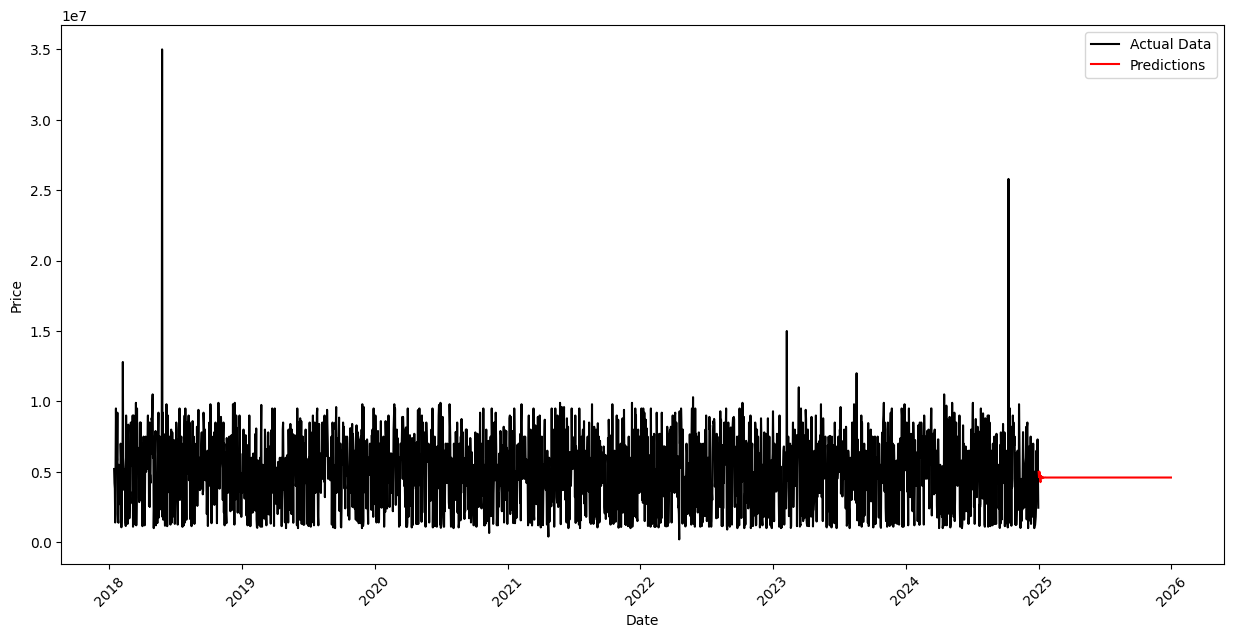

In [134]:
model3=ARIMA(df_model['Price_Sqrt'].dropna(),order=(5,1,0))
model3=model3.fit()
forecast_steps=365
predictions=model3.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = pred**2
    predicted_prices.append(t)
plt.figure(figsize=(15,7))
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [135]:
predicted_prices[0:5]

[4989785.29853384,
 4620104.508406367,
 5010551.098229168,
 4840101.456799812,
 4440367.303900711]

In [136]:
model=auto_arima(df_model['Price_Cbrt'].dropna(),seasonal=False,trace=True,stepwise=False)
model=model.fit(df_model['Price_Cbrt'].dropna())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26691.320, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.46 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.13 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=6.92 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=5.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25953.368, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.97 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.96 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=25649.441, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.92 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=25482.973, Time=0.46 sec


In [137]:
model4=ARIMA(train['Price_Cbrt'].dropna(),order=(5,1,0))
model4=model4.fit()
arima_pred=model4.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPred4']=arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Cbrt'],test['arimaPred4'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


42.871980414195605


<ipython-input-137-48ae1052055b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred4']=arima_pred.values


In [138]:
mae = mean_absolute_error(test['Price_Cbrt'], test['arimaPred4'])
mse = mean_squared_error(test['Price_Cbrt'], test['arimaPred4'])
rmse = np.sqrt(mse)
aic=model4.aic
bic=model4.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 32.42053185337744 MSE 1838.0067046351717 RMSE 42.871980414195605 AIC 5779.861767253345 BIC 5806.081173150314


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


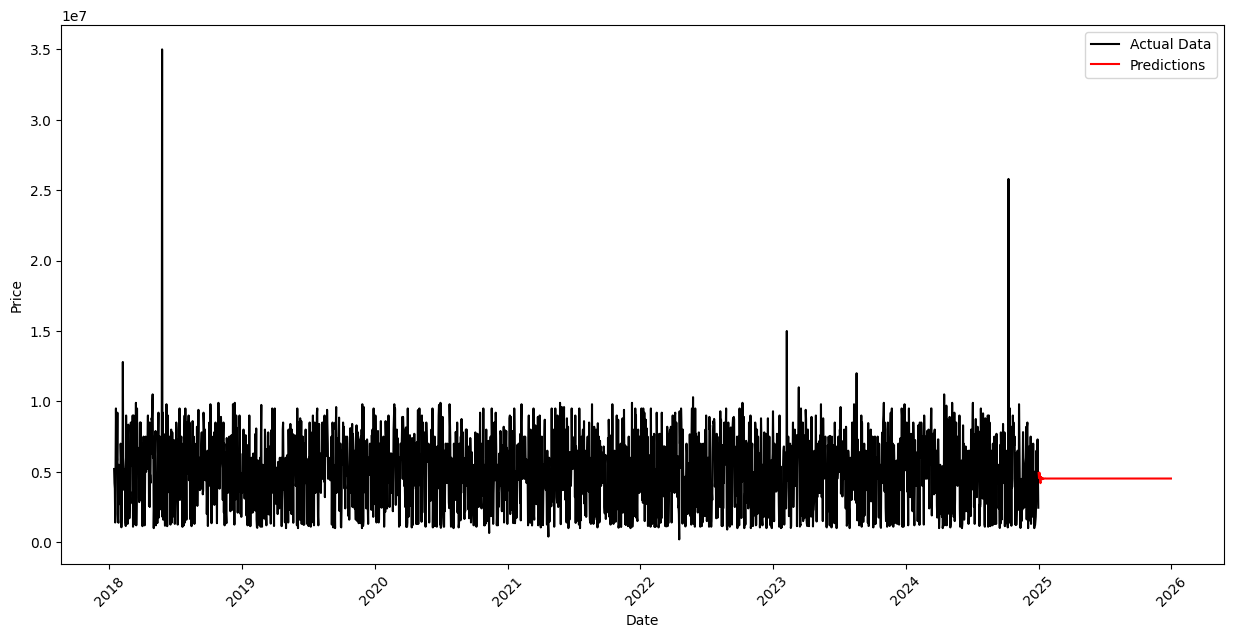

In [139]:
model4=ARIMA(df_model['Price_Cbrt'].dropna(),order=(5,1,0))
model4=model4.fit()
forecast_steps=365
future_dates=pd.date_range(start='2025-01-01',periods=forecast_steps,freq='D')
predictions=model4.forecast(steps=forecast_steps)
predicted_prices=[]
for pred in predictions.values:
  t=pred**3
  predicted_prices.append(t)
plt.figure(figsize=(15,7))
plt.plot(df_model.index,df_model['Price'],label='Actual Data',color="black")
plt.plot(future_dates,predicted_prices,label='Predictions',color='red')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [140]:
predicted_prices[0:5]

[4909169.879916102,
 4556066.19632575,
 4945184.585640882,
 4773250.269831081,
 4370619.005982732]

In [141]:
model=auto_arima(df_model['Price_Log_Sqrt'].dropna(),seasonal=False,trace=True,stepwise=False)
model=model.fit(df_model['Price_Log_Sqrt'].dropna())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3685.571, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.78 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.99 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-5404.297, Time=5.54 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-5428.442, Time=6.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4408.418, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5411.818, Time=4.75 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-5415.702, Time=4.91 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4711.812, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.72 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-

In [142]:
model5=ARIMA(train['Price_Log_Sqrt'].dropna(),order=(0,1,5))
model5=model5.fit()
arima_pred=model5.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPred5']=arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Log_Sqrt'],test['arimaPred5'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.08690410925916774


<ipython-input-142-49d1c78b3fb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred5']=arima_pred.values


In [143]:
mae = mean_absolute_error(test['Price_Log_Sqrt'], test['arimaPred5'])
mse = mean_squared_error(test['Price_Log_Sqrt'], test['arimaPred5'])
rmse = np.sqrt(mse)
aic=model5.aic
bic=model5.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.06557936657891415 MSE 0.0075523242061293645 RMSE 0.08690410925916774  AIC -1296.8824206906052 BIC -1270.6630147936357


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


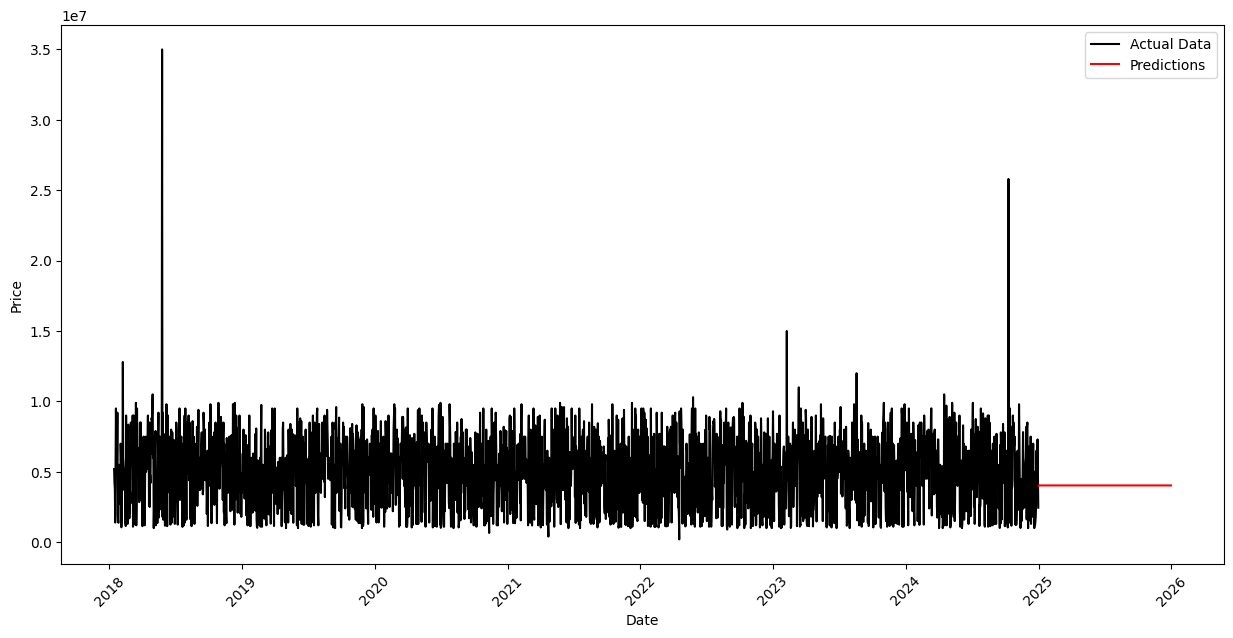

In [144]:
model5=ARIMA(df_model['Price_Log_Sqrt'].dropna(),order=(0,1,5))
model5=model5.fit()
forecast_steps=365
future_dates=pd.date_range(start='2025-01-01',periods=forecast_steps,freq='D')
predictions=model5.forecast(steps=forecast_steps)
predicted_prices=[]
for pred in predictions.values:
  t=np.exp(pred**2)
  predicted_prices.append(t)
plt.figure(figsize=(15,7))
plt.plot(df_model.index,df_model['Price'],label='Actual Data',color="black")
plt.plot(future_dates,predicted_prices,label='Predictions',color='red')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [145]:
predicted_prices[0:2]

[4022381.4384241183, 4035764.238038238]

In [146]:
model = auto_arima(df_model['Price_Log_Cbrt'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Log_Cbrt'].dropna())


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8041.923, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9638.712, Time=1.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=8.79 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-9740.278, Time=2.78 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-9753.729, Time=2.87 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8764.338, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.92 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-9767.125, Time=9.70 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-9771.206, Time=7.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9067.683, Time=2.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9754.594, Time=4.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=8.52 sec
 ARIMA(3,1,0)(0,0,0)[0] interce

In [147]:
model6 = ARIMA(train['Price_Log_Cbrt'].dropna(), order=(4,1,1))
model6 = model6.fit()
arima_pred = model6.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred6'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Log_Cbrt'], test['arimaPred6'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


0.03678911611560675


<ipython-input-147-a8f0db3b39eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred6'] = arima_pred.values


In [148]:
mae = mean_absolute_error(test['Price_Log_Cbrt'], test['arimaPred6'])
mse = mean_squared_error(test['Price_Log_Cbrt'], test['arimaPred6'])
rmse = np.sqrt(mse)
aic=model6.aic
bic=model6.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.027825463090882553 MSE 0.0013534390645675964 RMSE 0.03678911611560675  AIC -2297.8300696475053 BIC -2271.610663750536


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


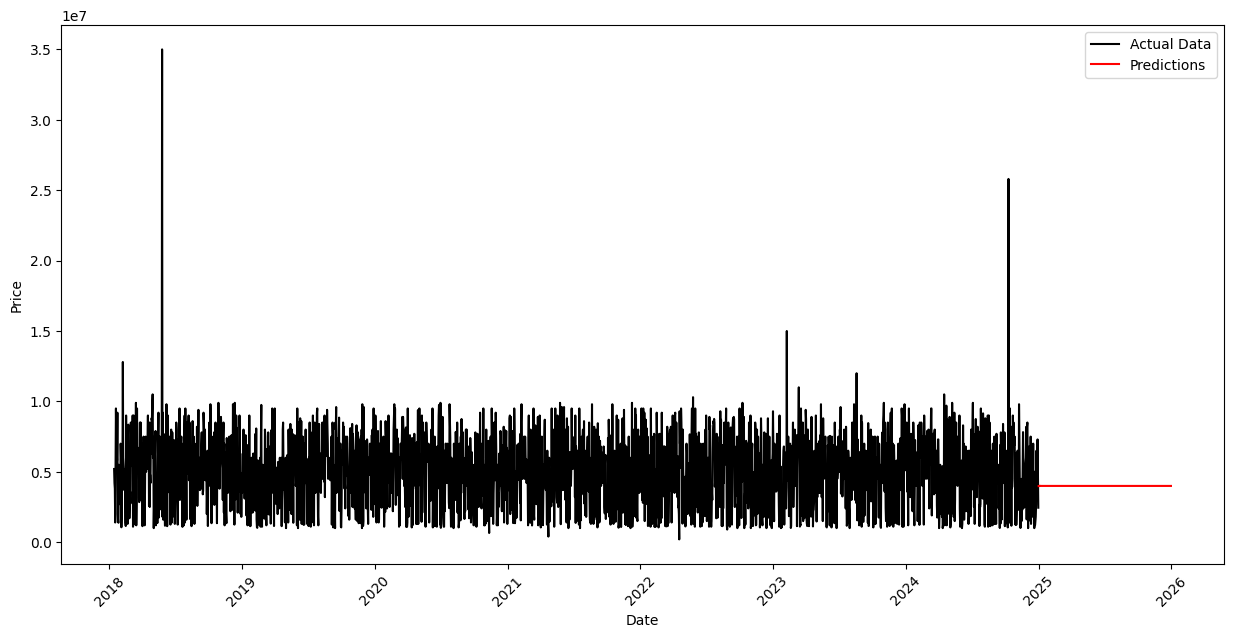

In [162]:

model6=ARIMA(df_model['Price_Log_Cbrt'].dropna(),order=(4,1,1))
model6=model6.fit()
forecast_steps=365
predictions=model6.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = np.exp(pred**3)
    predicted_prices.append(t)
plt.figure(figsize=(15,7))
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [164]:
predicted_prices[0:2]

[3985815.3901363686, 3989418.9942131946]

In [151]:
model = auto_arima(df_model['Price_Sqrt_Log'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Sqrt_Log'].dropna())


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3198.541, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.81 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1477.038, Time=5.12 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1452.630, Time=6.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2474.392, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.83 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.00 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=8.94 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2170.863, Time=0.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2008.891, Time=0.9

In [152]:
model7 = ARIMA(train['Price_Sqrt_Log'].dropna(), order=(0,1,5))
model7 = model7.fit()
arima_pred = model7.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred7'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Sqrt_Log'], test['arimaPred7'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.33607344533255645


<ipython-input-152-9600bad0ccc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred7'] = arima_pred.values


In [153]:
mae = mean_absolute_error(test['Price_Sqrt_Log'], test['arimaPred7'])
mse = mean_squared_error(test['Price_Sqrt_Log'], test['arimaPred7'])
rmse = np.sqrt(mse)
aic=model7.aic
bic=model7.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.2548126613427711 MSE 0.11294536065769482 RMSE 0.33607344533255645 AIC 285.79683330821695 BIC 312.0162392051863


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


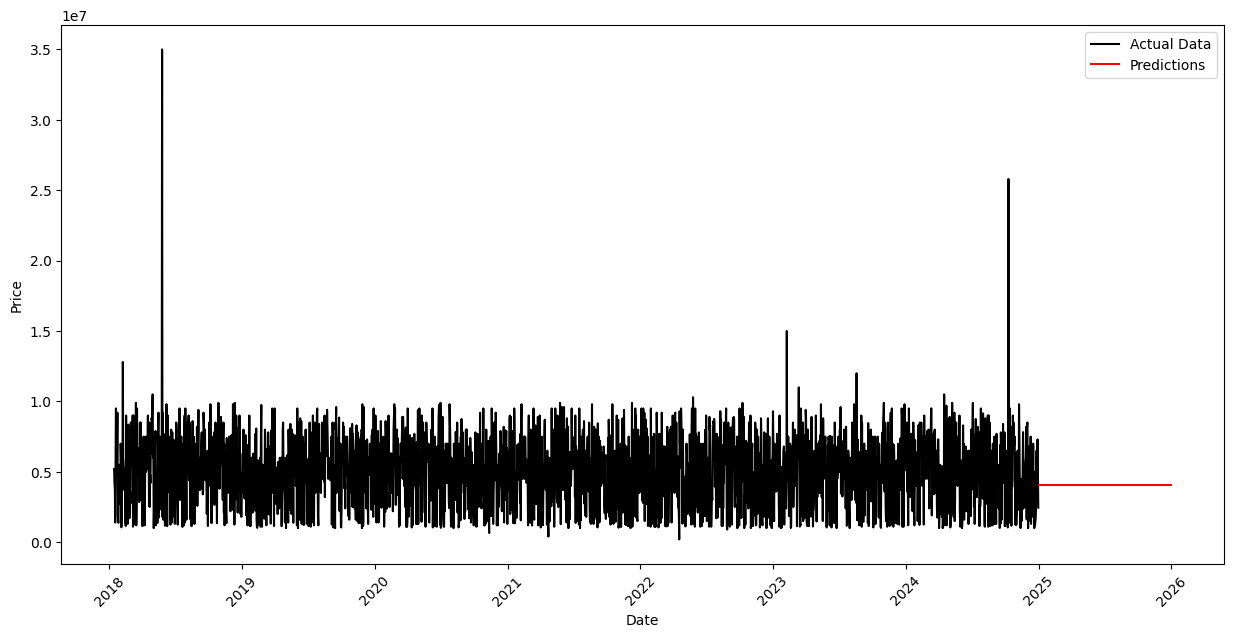

In [154]:

model7=ARIMA(df_model['Price_Sqrt_Log'].dropna(),order=(0,1,5))
model7=model7.fit()
forecast_steps=365
predictions=model7.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = (np.exp(pred))**2
    predicted_prices.append(t)
plt.figure(figsize=(15,7))
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [155]:
predicted_prices[0:2]

[4054001.319199414, 4066211.9937884575]

In [156]:
model = auto_arima(df_model['Price_Cbrt_Log'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Cbrt_Log'].dropna())


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1136.345, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.46 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=8.41 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=8.54 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-609.587, Time=9.96 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=412.196, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.64 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=9.69 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=108.668, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-53.304, Time=0.92 sec
 A

In [157]:
model8 = ARIMA(train['Price_Cbrt_Log'].dropna(), order=(0,1,5))
model8 = model8.fit()
arima_pred = model8.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred8'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Cbrt_Log'], test['arimaPred8'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.22405087335045323


<ipython-input-157-9e8cb703cdfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred8'] = arima_pred.values


In [158]:
mae = mean_absolute_error(test['Price_Cbrt_Log'], test['arimaPred8'])
mse = mean_squared_error(test['Price_Cbrt_Log'], test['arimaPred8'])
rmse = np.sqrt(mse)
aic=model8.aic
bic=model8.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.16987491882164849 MSE 0.05019879384910084 RMSE 0.22405087335045323 AIC -187.78641384246765 BIC -161.5670079454983


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


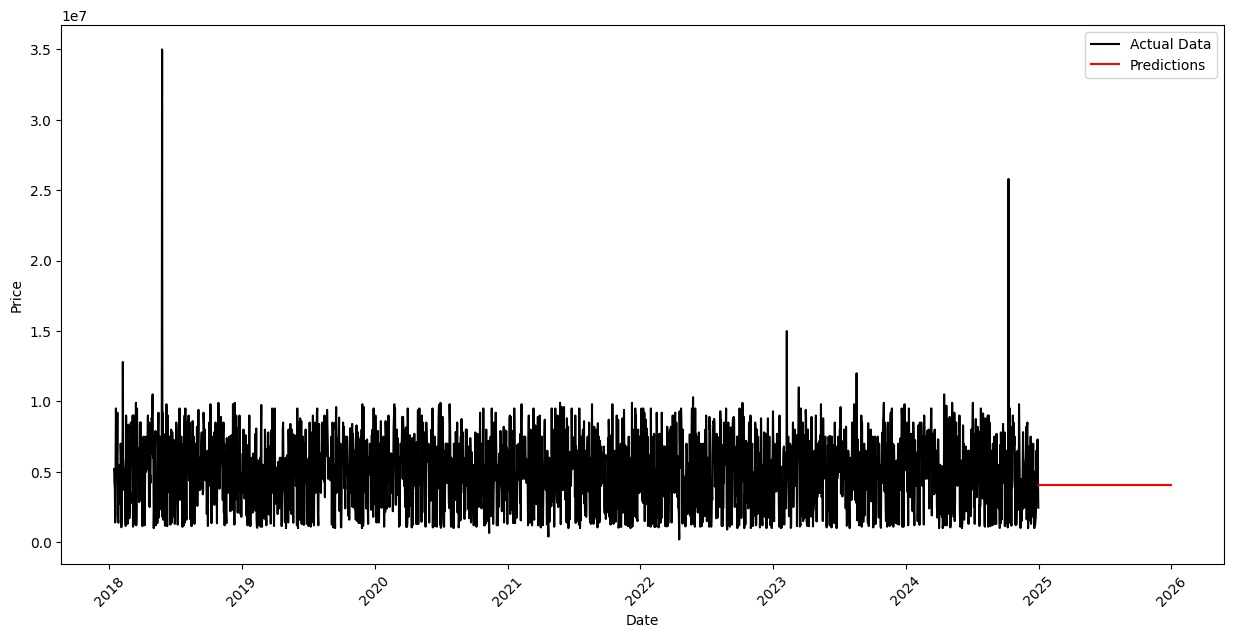

In [159]:

model8=ARIMA(df_model['Price_Cbrt_Log'].dropna(),order=(0,1,5))
model8=model8.fit()
forecast_steps=365
predictions=model8.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = (np.exp(pred))**3
    predicted_prices.append(t)
plt.figure(figsize=(15,7))
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [160]:
predicted_prices[0:2]

[4053883.412995034, 4066087.3044717447]

This is the final set of evaluation metrics obtained from various ARIMA Models

**Model 1**

* MAE 2862870.127418819
* MSE 12963495486620.764
* RMSE 3600485.4515218865  
* AIC 19088.829490810585
* BIC 19119.43077374121

**Model 2**

* MAE 0.5096249422390108
* MSE 0.45178635982667215
* RMSE 0.6721505484835016
* AIC 1095.3927363673195
* BIC 1121.6121422642889

**Model 3**

* MAE 628.5423379112817
* MSE 659850.057303643
* RMSE 812.3115518713513  
* AIC 9221.074655380016
* BIC 9247.294061276985


**Model 4**

* MAE 32.42053185337744
* MSE 1838.0067046351717
* RMSE 42.871980414195605
* AIC 5779.861767253345
* BIC 5806.081173150314

**Model 5**

* MAE 0.06557936657891415
* MSE 0.0075523242061293645
* RMSE 0.08690410925916774  
* AIC -1296.8824206906052
* BIC -1270.6630147936357

**Model 6**

* MAE 0.027825463090882553
* MSE 0.0013534390645675964
* RMSE 0.03678911611560675  
* AIC -2297.8300696475053
* BIC -2271.610663750536

**Model 7**

* MAE 0.2548126613427711
* MSE 0.11294536065769482
* RMSE 0.33607344533255645
* AIC 285.79683330821695
* BIC 312.0162392051863

**Model 8**

*   MAE 0.16987491882164849
*   MSE 0.05019879384910084
*   RMSE 0.22405087335045323
*   AIC -187.78641384246765
*   BIC -161.5670079454983


Model 6 has the best performance as all its metrics are lower than other models
